# W16D8 - ESAME FINALE PYTHON 


## IMPORT DATASET COVID

In [1]:
from sqlalchemy import create_engine
import dotenv
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
path = r"C:\Users\Chiara\OneDrive\Desktop\EPICODE\MODULO IV - Phyton\Week 12\Esercizi 12\W16D8 - ESAME PYTHON\Materiali W16D8\owid-covid-data.csv"
covid = pd.read_csv(path)


### Esplorazione e analisi del Dataframe Covid

In [3]:
covid.sample(15)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
235749,NRU,Oceania,Nauru,2022-01-23,NaN,0.0,0.000,NaN,0.0,0.000,...,36.9,NaN,5.000,59.96,NaN,12691.0,NaN,NaN,NaN,NaN
60486,CPV,Africa,Cape Verde,2020-12-09,11036.0,0.0,48.000,105.0,0.0,0.143,...,16.5,NaN,2.100,72.98,0.665,593162.0,NaN,NaN,NaN,NaN
379415,VNM,Asia,Vietnam,2022-08-14,11364355.0,18218.0,2602.571,43098.0,4.0,0.571,...,45.9,85.847,2.600,75.40,0.704,98186856.0,NaN,NaN,NaN,NaN
49877,BRN,Asia,Brunei,2021-06-27,259.0,4.0,0.571,3.0,0.0,0.000,...,30.9,NaN,2.700,75.86,0.838,449002.0,NaN,NaN,NaN,NaN
252254,MKD,Europe,North Macedonia,2020-10-11,21113.0,2243.0,320.429,815.0,34.0,4.857,...,NaN,NaN,4.280,75.80,0.774,2093606.0,NaN,NaN,NaN,NaN
297505,VCT,North America,Saint Vincent and the Grenadines,2020-11-15,78.0,2.0,0.286,NaN,0.0,0.000,...,NaN,NaN,2.600,72.53,0.738,103959.0,NaN,NaN,NaN,NaN
73887,COG,Africa,Congo,2023-11-17,25213.0,0.0,0.000,389.0,0.0,0.000,...,52.3,47.964,NaN,64.57,0.574,5970430.0,NaN,NaN,NaN,NaN
382180,WLF,Oceania,Wallis and Futuna,2022-09-09,761.0,0.0,0.000,7.0,0.0,0.000,...,NaN,NaN,NaN,79.94,NaN,11596.0,NaN,NaN,NaN,NaN
102987,ERI,Africa,Eritrea,2023-11-03,10189.0,0.0,0.000,103.0,0.0,0.000,...,11.4,NaN,0.700,66.32,0.459,3684041.0,NaN,NaN,NaN,NaN
184170,LAO,Asia,Laos,2022-05-12,208829.0,0.0,174.429,671.0,0.0,0.000,...,51.2,49.839,1.500,67.92,0.613,7529477.0,NaN,NaN,NaN,NaN


In [4]:
#verificare le dimensioni del dataset

covid.shape

(388920, 67)

In [5]:
#verificarne i metadati

covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388920 entries, 0 to 388919
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    388920 non-null  object 
 1   continent                                   370329 non-null  object 
 2   location                                    388920 non-null  object 
 3   date                                        388920 non-null  object 
 4   total_cases                                 350041 non-null  float64
 5   new_cases                                   377974 non-null  float64
 6   new_cases_smoothed                          376744 non-null  float64
 7   total_deaths                                327775 non-null  float64
 8   new_deaths                                  378290 non-null  float64
 9   new_deaths_smoothed                         377060 non-null  float64
 

In [6]:
#analizzo i dati nulli

covid.isna().sum()

iso_code                                        0
continent                                   18591
location                                        0
date                                            0
total_cases                                 38879
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       375733
excess_mortality_cumulative                375733
excess_mortality                           375733
excess_mortality_cumulative_per_million    375733
Length: 67, dtype: int64

In [7]:
list(covid.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'total_tests',
 'new_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

## Svolgimento richieste: 

### Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente; si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;

In [8]:
casi_continenti = covid.groupby('continent')['new_cases'].sum()

casi_continenti

continent
Africa            13141439.0
Asia             301451451.0
Europe           252417184.0
North America    124530677.0
Oceania           14814266.0
South America     68844492.0
Name: new_cases, dtype: float64

In [9]:
casi_globali = casi_continenti.sum()
casi_globali

775199509.0

#### Metodo 1: volgimento richiesta su tutti e 4 i continenti

In [10]:
#percentuale casi continenti rispetto a casi totali

percentuale = (casi_continenti/casi_globali)*100
percentuale.round(2)

continent
Africa            1.70
Asia             38.89
Europe           32.56
North America    16.06
Oceania           1.91
South America     8.88
Name: new_cases, dtype: float64

In [11]:
mean_max_cont = covid.groupby('continent')['new_cases'].agg(['max','mean']).round(2)
mean_max_cont

,max,mean
continent,,
Africa,162987.0,149.62
Asia,40475477.0,4162.31
Europe,2417043.0,3244.19
North America,5650933.0,1980.83
Oceania,588813.0,400.59
South America,1283024.0,3191.23


#### Svolgimento richiesta utilizzando due variabili

In [12]:
list(covid['continent'].unique())

['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America', 'South America']

In [13]:
asia = covid.loc[covid['continent'] == 'Asia']
sudamerica = covid.loc[covid['continent'] == 'South America']


In [14]:
casi_sud = sudamerica['new_cases'].agg(['max','mean']).round(2)
casi_sud

max     1283024.00
mean       3191.23
Name: new_cases, dtype: float64

In [15]:
casi_asia = asia['new_cases'].agg(['max','mean']).round(2)
casi_asia

max     40475477.00
mean        4162.31
Name: new_cases, dtype: float64

In [16]:
asia_sudamerica = pd.concat([casi_sud, casi_asia], keys=['Sud America', 'Asia'])

asia_sudamerica

Sud America  max      1283024.00
             mean        3191.23
Asia         max     40475477.00
             mean        4162.31
Name: new_cases, dtype: float64

In [17]:
tot_casi_sud = sudamerica['new_cases'].sum()
tot_casi_asia = asia['new_cases'].sum()

In [18]:
perc_asia = (tot_casi_asia/casi_globali*100).round(2)
perc_sudamerica = (tot_casi_sud/casi_globali*100).round(2)

print ('la percentuale dei casi in asia rispetto ai totali è:', perc_asia,'%','\nla % dei casi in Sudamerica rispetto ai totali è:', perc_sudamerica, '%') 

la percentuale dei casi in asia rispetto ai totali è: 38.89 % 
la % dei casi in Sudamerica rispetto ai totali è: 8.88 %


### Calcolo Casi in Italia nel 2022

In [19]:
covid['date'] = pd.to_datetime(covid['date'])

In [20]:
italia_2022 = covid.loc[(covid['location'] == 'Italy') & (covid['date'].dt.year == 2022)]

italia_2022

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
167077,ITA,Europe,Italy,2022-01-01,5622431.0,0.0,36797.000,136530.0,0.0,140.857,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167078,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,92086.286,137513.0,983.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,168226.3,12.99,8.06,2849.4834
167079,ITA,Europe,Italy,2022-01-03,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167080,ITA,Europe,Italy,2022-01-04,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167081,ITA,Europe,Italy,2022-01-05,6267035.0,0.0,92086.286,137513.0,0.0,140.429,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167437,ITA,Europe,Italy,2022-12-27,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167438,ITA,Europe,Italy,2022-12-28,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167439,ITA,Europe,Italy,2022-12-29,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167440,ITA,Europe,Italy,2022-12-30,25060503.0,0.0,18918.143,184168.0,0.0,114.000,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN


In [21]:
italia22 = italia_2022.set_index('date')

### Grafico andamento casi totali in Italia 2022

<Axes: xlabel='Date', ylabel='Total Cases'>

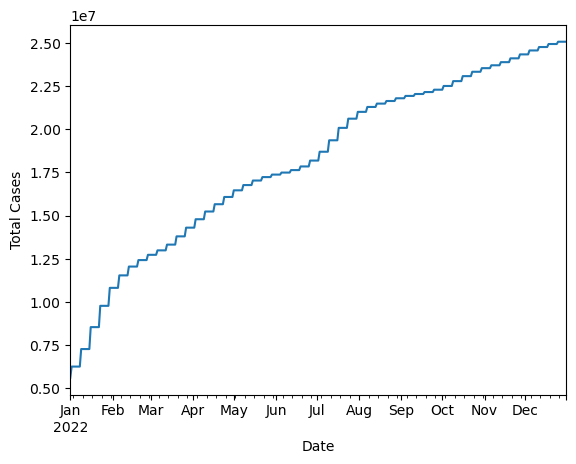

In [22]:
grafico_tot_ita = italia22['total_cases'].plot(x='date', y='total_cases', xlabel='Date', ylabel='Total Cases')
grafico_tot_ita

### Grafico andamento nuovi casi in Italia 2022

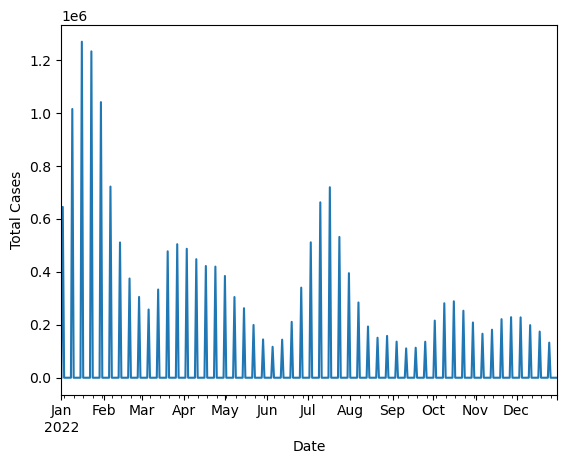

In [23]:
grafico_new_ita = italia22['new_cases'].plot(x='date', y='total_cases', xlabel='Date', ylabel='Total Cases')


### Grafico somma cumulativa casi in Italia 2022

In [24]:
somma_cum_ita = italia22['new_cases'].cumsum()
somma_cum_ita.sum()

4592857381.0

<Axes: xlabel='date'>

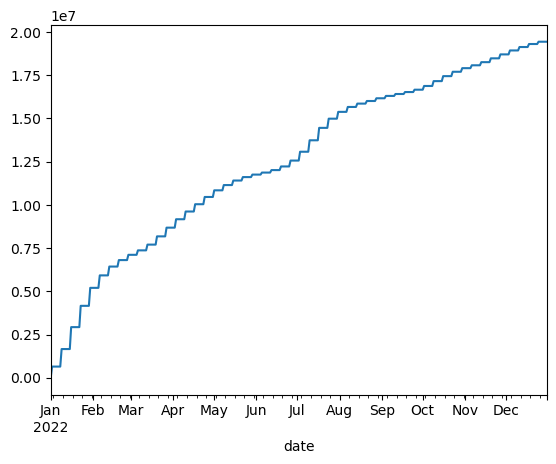

In [25]:
somma_cum_ita.plot()

<Axes: xlabel='Date', ylabel='Total Cases'>

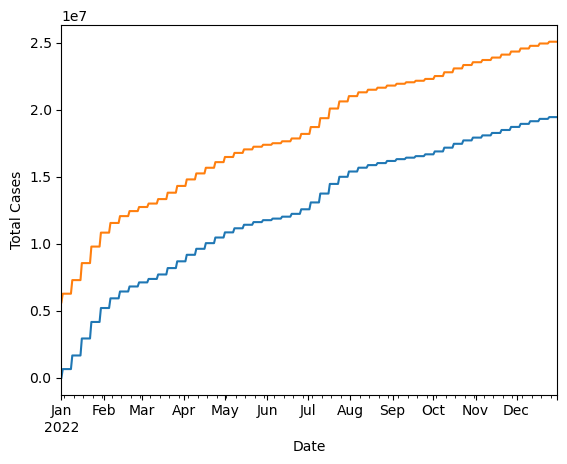

In [26]:
somma_cum_ita.plot()
italia22['total_cases'].plot(x='date', y='total_cases', xlabel='Date', ylabel='Total Cases')

In [27]:
somma_ita = italia22['total_cases'].sum()
somma_ita

6645044696.0

 ## Confronto somma casi totali e somma cumulativa nuovi casi
### Analizzando anche graficamente i due risultati è possibile osservare come i due dati seguano lo stesso identico andamento ciò è dovuto dal fatto che la colonna dei casi totali segue già di per sè una logica cumulativa. L'unica differenza è il punto di inizio e di fine delle linee del grafico la ragione sta nel fatto che la somma cumulativa viene fatta sui nuovi casi che il giorno 01-01-2022 sono pari a 0 mentre la somma dei casi totali parte già tenendo conto i dati cumulativi ottenuti duranti gli anni precedenti.

### Italia Germania e Francia da Maggio 2022 a Giugno 2023 - Terapia Intensiva

In [28]:
italia_icu = covid.loc[(covid['location'] == 'Italy') & (covid['date'].between('2022-05-01', '2023-04-30'))]
germania_icu = covid.loc[(covid['location'] == 'Germany') & (covid['date'].between('2022-05-01', '2023-04-30'))]
francia_icu = covid.loc[(covid['location'] == 'France') & (covid['date'].between('2022-05-01', '2023-04-30'))]
covid_icu = pd.concat([italia_icu, germania_icu, francia_icu])

covid_icu

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
167197,ITA,Europe,Italy,2022-05-01,16463200.0,383991.0,54855.857,163507.0,898.0,128.286,...,27.8,NaN,3.18,83.51,0.892,59037472.0,186897.39,12.24,9.10,3165.7417
167198,ITA,Europe,Italy,2022-05-02,16463200.0,0.0,54855.857,163507.0,0.0,128.286,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167199,ITA,Europe,Italy,2022-05-03,16463200.0,0.0,54855.857,163507.0,0.0,128.286,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167200,ITA,Europe,Italy,2022-05-04,16463200.0,0.0,54855.857,163507.0,0.0,128.286,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
167201,ITA,Europe,Italy,2022-05-05,16463200.0,0.0,54855.857,163507.0,0.0,128.286,...,27.8,NaN,3.18,83.51,0.892,59037472.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118238,FRA,Europe,France,2023-04-26,38802141.0,0.0,6939.714,166709.0,0.0,40.000,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
118239,FRA,Europe,France,2023-04-27,38802141.0,0.0,6939.714,166709.0,0.0,40.000,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
118240,FRA,Europe,France,2023-04-28,38802141.0,0.0,6939.714,166709.0,0.0,40.000,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
118241,FRA,Europe,France,2023-04-29,38802141.0,0.0,6939.714,166709.0,0.0,40.000,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN


<Axes: xlabel='location', ylabel='icu_patients'>

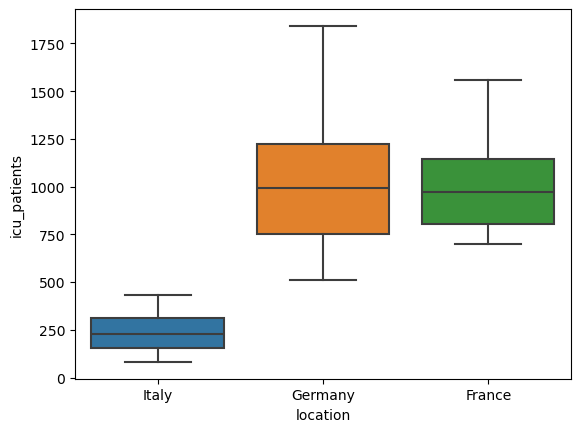

In [29]:
sns.boxplot(x='location', y='icu_patients', data=covid_icu)

In [30]:
italia_icu['icu_patients'].sum()

84408.0

In [31]:
germania_icu['icu_patients'].sum()

373171.0

In [32]:
francia_icu['icu_patients'].sum()

334457.0

#### Commento riguardo al boxplot:

##### Dal grafico risulta evidente come l'Italia tra Maggio 2022 e Aprile 2023 abbia avuto un numero nettamente minore di pazienti in terapia intensiva rispetto a Francia e Germania

### Pazienti ospedalizzati Italia, Germania, Francia e Spagna 2023

In [33]:
covid['hosp_patients'].isna().sum()

348712

In [34]:
covid['hosp_patients'].shape

(388920,)

In [35]:
covid['hosp_patients'].sample(20)

10269    NaN
388282   NaN
311585   NaN
341408   NaN
113556   NaN
138178   NaN
141147   NaN
66803    NaN
313039   NaN
327322   NaN
279923   NaN
337351   NaN
298270   NaN
387601   NaN
43482    NaN
5488     NaN
332548   NaN
323558   NaN
41754    NaN
30329    NaN
Name: hosp_patients, dtype: float64

In [36]:
covid_hosp = covid.loc[(covid['location'].isin(['Italy', 'Germany', 'France', 'Spain'])) & (covid['date'].dt.year == 2023)]

covid_hosp

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
118123,FRA,Europe,France,2023-01-01,38141254.0,151707.0,21672.429,162475.0,808.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,122180.83,6.64,25.88,1886.7708
118124,FRA,Europe,France,2023-01-02,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
118125,FRA,Europe,France,2023-01-03,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
118126,FRA,Europe,France,2023-01-04,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
118127,FRA,Europe,France,2023-01-05,38141254.0,0.0,21672.429,162475.0,0.0,115.429,...,35.6,NaN,5.98,82.66,0.901,67813000.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329226,ESP,Europe,Spain,2023-12-27,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
329227,ESP,Europe,Spain,2023-12-28,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
329228,ESP,Europe,Spain,2023-12-29,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN
329229,ESP,Europe,Spain,2023-12-30,13980340.0,NaN,NaN,121852.0,NaN,NaN,...,31.4,NaN,2.97,83.56,0.904,47558632.0,NaN,NaN,NaN,NaN


In [37]:
sum_hosp = covid_hosp.groupby('location')['hosp_patients'].sum()

sum_hosp

location
France     1382574.0
Germany          0.0
Italy      1175272.0
Spain       354602.0
Name: hosp_patients, dtype: float64

### Analisi sui valori nulli

In [38]:
nulli_hosp = covid_hosp['hosp_patients'].isna().sum()
nulli_hosp

843

In [39]:
percentuale_nulli_hosp = (nulli_hosp/1460)*100
percentuale_nulli_hosp

57.73972602739727

In [40]:
hosp_ita = covid.loc[(covid['location'] == 'Italy') & (covid['date'].dt.year == 2023)]
hosp_ita['hosp_patients'].isna().sum()

0

In [41]:
hosp_ger = covid.loc[(covid['location'] == 'Germany') & (covid['date'].dt.year == 2023)]
hosp_ger['hosp_patients'].isna().sum()

365

In [42]:
hosp_sp = covid.loc[(covid['location'] == 'Spain') & (covid['date'].dt.year == 2023)]
hosp_sp['hosp_patients'].isna().sum()

203

In [43]:
hosp_fr = covid.loc[(covid['location'] == 'France') & (covid['date'].dt.year == 2023)]
hosp_fr['hosp_patients'].isna().sum()

275

<Axes: xlabel='Date', ylabel='Ospedalizzati'>

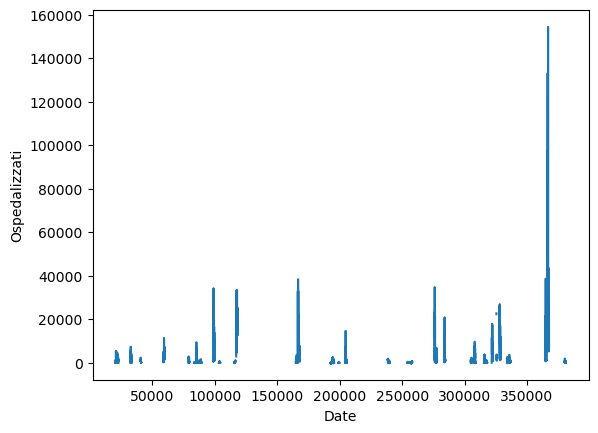

In [44]:
covid['hosp_patients'].plot(x='date', y='hosp_patients', xlabel='Date', ylabel='Ospedalizzati')

#### Il dataset presenta un gran numero di dati nulli, circa il 58% dei dati filtrati per rispondere al quesito sono nulli. Una così alta percentuale di dati mancanti non permette di svolgere un'analisi completa e realistica sopratutto perchè non si tratta di dati mancanti per un specifico periodo di tempo ma sparsi nel corso dell'anno (come mostrato nel grafico sopra). Una sostituzione utilizzando .fillna() comporterebbe una sostituzione di tutti i valori nulli o in alternativa un lavoro eccessivamente lungo e macchinoso per andare a modificare le singole righe, ciò significa che sarebbe un lavoro inutile o non necessario poichè non darebbe alcun dato aggiuntivo al dataframe attuale. Poichè come detto si tratta di valori nulli in diversi periodi e in diversi Stati è impossibile individuare un valore univoco e veritiero con cui sostituire il NaN.
#### Un'analisi più approfondita rivela che l'Italia è l'unico Paese a non presentare valori nulli, i risultati relativi agli ospedalizzati in italia risulta quindi affidabile.